<a href="https://colab.research.google.com/github/MattiaSC01/Replicated-SGD---Autoencoder/blob/main/Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

import tensorflow as tf
from tensorflow import keras

import models

import matplotlib as mpl
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [2]:
# FROM THE HANDS-ON TEXTBOOK

# Where to save the figures
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "prova"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
x_train = x_train.reshape(60000, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(10000, 784).astype(np.float32) / 255.0

# Vanilla AutoEncoder

In [ ]:
input_dim = 784
bottleneck = 1000
hidden_layers = 0
n_neurons = 0
activation = 'relu'
activation_last = None

MODEL = "Vanilla/"

In [ ]:
vanilla = models.AutoEncoder(input_dim,
                             bottleneck,
                             hidden_layers,
                             n_neurons,
                             activation,
                             activation_last)
vanilla.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.MeanSquaredError())

In [ ]:
path = "models/" + MODEL + str(hidden_layers) + '/' + str(bottleneck)
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=path,
    monitor='loss',
    save_weights_only=True
)

stop_training_callback = models.StopTrainingCallback(epsilon=0.001)

In [ ]:
vanilla.fit(x_train,
            x_train,
            epochs=10,
            callbacks=[checkpoint_callback, stop_training_callback])

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.0055
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.3726e-04


In [20]:
def train_vanilla(
    x_train,
    y_train,
    bottleneck,
    n_iter=1,
    epochs = 50,
    n_samples = None,
    zero_error=0.001,
    zero_improvement=0.0001,
    patience=3,
    seed=42,
    input_dim=784,
    hidden_layers=0,
    n_neurons=0,
    activation='relu',
    activation_last=None,
    name='vanilla'
):
    
    if n_samples is not None:
        x_small, _ = models.subsample(x_train, y_train, n_samples, seed)
    else:
        x_small = x_train
    
    for i in range(n_iter):
        
        print(f"\nBeginning training of the {i}-th model\n\n")

        vanilla = models.AutoEncoder(
            input_dim,
            bottleneck,
            hidden_layers,
            n_neurons,
            activation,
            activation_last
        )

        vanilla.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.MeanSquaredError())
        
        path = f"models/{name}/{str(hidden_layers)}_{str(bottleneck)}_{i}"
        
        checkpoint_callback = keras.callbacks.ModelCheckpoint(
            filepath=path,
            monitor='loss',
            save_weights_only=True
        )
        stop_training_callback = models.StopTrainingCallback(epsilon=zero_error,
                                                             monitor='loss')
        early_stopping_callback = keras.callbacks.EarlyStopping(monitor='loss',
                                                    min_delta=zero_improvement,
                                                    patience=patience)
        callbacks = [
                     checkpoint_callback, 
                     stop_training_callback,
                     early_stopping_callback,
                     ]

        history = vanilla.fit(x_small, x_small, epochs=epochs,
                        callbacks=callbacks)


In [22]:
train_vanilla(x_train, y_train, 500, 2, 10)


Beginning training of the 0-th model


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0076
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0023
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0018
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0018
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0016

Beginning training of the 1-th model


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0076
Epoch 

# Denoising AutoEncoder

In [25]:
def train_denoising(
    x_train,
    y_train,
    bottleneck,
    stddev,
    n_iter=1,
    epochs = 50,
    n_samples = None,
    zero_error=0.001,
    zero_improvement=0.0001,
    patience=3,
    seed=42,
    input_dim=784,
    hidden_layers=0,
    n_neurons=0,
    activation='relu',
    activation_last=None,
    name='denoising'
):
    
    if n_samples is not None:
        x_small, _ = models.subsample(x_train, y_train, n_samples, seed)
    else:
        x_small = x_train
    
    for i in range(n_iter):
        
        print(f"\nBeginning training of the {i}-th model\n\n")

        denoising = models.DenoisingAutoEncoder(
            input_dim,
            bottleneck,
            stddev,
            hidden_layers,
            n_neurons,
            activation,
            activation_last
        )

        denoising.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.MeanSquaredError())
        
        path = f"models/{name}/{str(hidden_layers)}_{str(bottleneck)}_{i}"
        
        checkpoint_callback = keras.callbacks.ModelCheckpoint(
            filepath=path,
            monitor='loss',
            save_weights_only=True
        )
        stop_training_callback = models.StopTrainingCallback(epsilon=zero_error,
                                                             monitor='loss')
        early_stopping_callback = keras.callbacks.EarlyStopping(monitor='loss',
                                                    min_delta=zero_improvement,
                                                    patience=patience)
        callbacks = [
                     checkpoint_callback, 
                     stop_training_callback,
                     early_stopping_callback,
                     ]

        history = denoising.fit(x_small, x_small, epochs=epochs,
                        callbacks=callbacks)


In [29]:
train_denoising(x_train, y_train, 1000, 0.3, 1, 10)


Beginning training of the 0-th model


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0182
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0120
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0115
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0113
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0111
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0110
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0107


In [30]:
def load_model(cls, config, compile_config, path, batch):
    loaded = cls(**config)
    loaded.compile(**compile_config)
    loaded.train_on_batch(batch, batch)
    loaded.load_weights(path)

    return loaded

In [70]:
config = {
    "input_dim": 784,
    "bottleneck": 1000,
    "stddev": 0.3,
    "hidden_layers": 0,
    "n_neurons": 0,
    "activation": 'relu',
    "activation_last": None,
}

compile_config = {
    "optimizer": keras.optimizers.Adam(),
    "loss": keras.losses.MeanSquaredError(),
}

In [71]:
loaded = load_model(
    models.DenoisingAutoEncoder,
    config,
    compile_config,
    "models/denoising/0_1000_0",
    x_train[:1]
)

In [73]:
digits = x_test[:50]
digits_noisy = models.add_gaussian_noise(digits, stddev=0.8)

Saving figure original digits


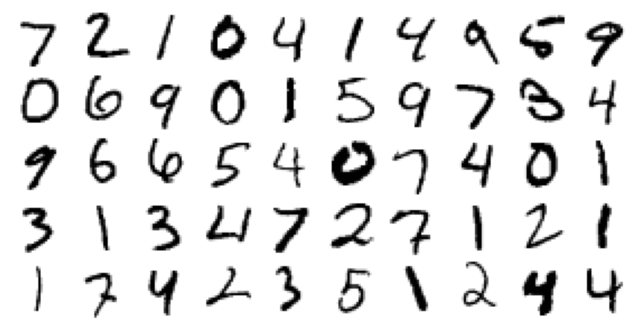

In [74]:
plt.figure(figsize=(9,9))
plot_digits(digits, images_per_row=10)
save_fig("original digits")
plt.show()

Saving figure noisy digits


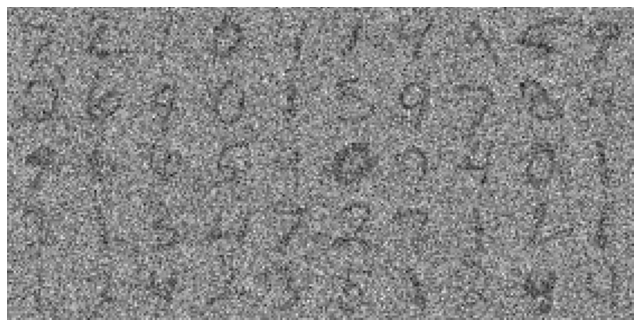

In [75]:
plt.figure(figsize=(9,9))
plot_digits(digits_noisy, images_per_row=10)
save_fig("noisy digits")
plt.show()

Saving figure denoised digits


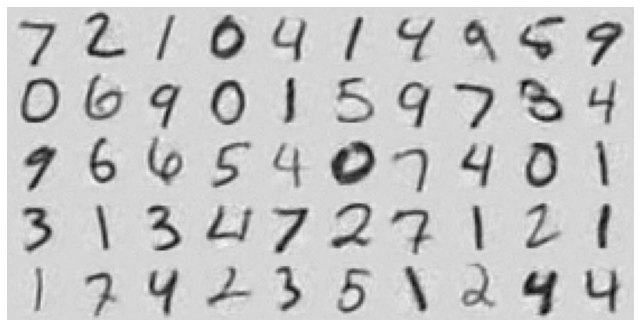

In [76]:
digits_denoised = loaded(digits)

plt.figure(figsize=(9,9))
plot_digits(digits_denoised, images_per_row=10)
save_fig("denoised digits")
plt.show()

# Replicated AutoEncoder

In [47]:
def train_replicated(
    x_train,
    y_train,
    bottleneck,
    initial_rate,
    update_coeff,
    n_iter=1,
    epochs = 50,
    n_replicas=5,
    n_samples = None,
    zero_error=0.001,
    zero_improvement=0.0001,
    patience=3,
    seed=42,
    input_dim=784,
    hidden_layers=0,
    n_neurons=0,
    activation='relu',
    activation_last=None,
    name='replicated',
    full=False,
):
    
    if n_samples is not None:
        x_small, _ = models.subsample(x_train, y_train, n_samples, seed)
    else:
        x_small = x_train
    
    if full:
        cls = models.FullReplicatedAutoEncoder
    else:
        cls = models.EncoderReplicatedAutoEncoder
    
    for i in range(n_iter):
        
        print(f"\nBeginning training of the {i}-th model\n\n")

        replicated = cls(
            input_dim,
            bottleneck,
            n_replicas,
            hidden_layers,
            n_neurons,
            activation,
            activation_last,
        )

        replicated.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.MeanSquaredError())
        
        path = f"models/{name}/{str(hidden_layers)}_{str(bottleneck)}_{i}"
        
        checkpoint_callback = keras.callbacks.ModelCheckpoint(
            filepath=path,
            monitor='loss',
            save_weights_only=True
        )
        stop_training_callback = models.StopTrainingCallback(epsilon=zero_error,
                                                             monitor='loss')
        early_stopping_callback = keras.callbacks.EarlyStopping(monitor='loss',
                                                    min_delta=zero_improvement,
                                                    patience=patience)
        exponential_rate_callback = models.ExponentialRateCallback(initial_rate,
                                                                   update_coeff)
        callbacks = [
                     checkpoint_callback, 
                     stop_training_callback,
                     early_stopping_callback,
                     exponential_rate_callback,
                     ]

        history = replicated.fit(x_small, x_small, epochs=epochs,
                        callbacks=callbacks)


In [48]:
train_replicated(x_train, y_train, 1000, 1e-6, 1, 1, 10)


Beginning training of the 0-th model




 Setting rate to 9.999999974752427e-07 


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0074 - reconstruction_loss: 0.0070 - distance_loss: 345.8754


 Setting rate to 1.9999999949504854e-06 


Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0018 - reconstruction_loss: 0.0017 - distance_loss: 60.0450


 Setting rate to 3.999999989900971e-06 


Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0012 - reconstruction_loss: 0.0011 - distance_loss: 25.8887


 Setting rate to 7.999999979801942e-06 


Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0010 - reconstruction_loss: 9.2595e-04 - distance_loss: 15.0523


 Setting rate to 1.5999999959603883e-05 


Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 9.8563e-04 - reconstruction_loss: 8.5100e-04 - distance_loss: 8.4144


In [49]:
config = {
    "input_dim": 784,
    "bottleneck": 1000,
    "n_replicas": 5,
    "hidden_layers": 0,
    "n_neurons": 0,
    "activation": 'relu',
    "activation_last": None,
}

compile_config = {
    "optimizer": keras.optimizers.Adam(),
    "loss": keras.losses.MeanSquaredError(),
}

In [51]:
loaded = load_model(
    models.EncoderReplicatedAutoEncoder,
    config,
    compile_config,
    "models/replicated/0_1000_0",
    x_train[:1]
)

In [67]:
digits = x_test[:50]
digits_noisy = models.add_gaussian_noise(digits, stddev=0.8)

Saving figure noisy digits


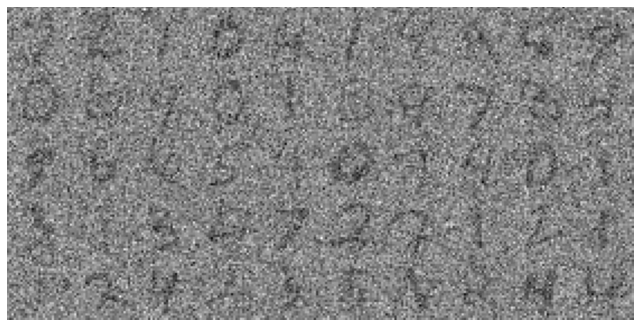

In [68]:
plt.figure(figsize=(9,9))
plot_digits(digits_noisy, images_per_row=10)
save_fig("noisy digits")
plt.show()

Saving figure denoised digits


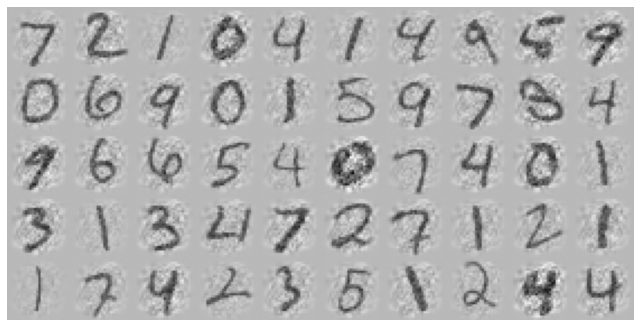

In [69]:
digits_denoised = loaded.decoder(loaded.baricenter(digits))

plt.figure(figsize=(9,9))
plot_digits(digits_denoised, images_per_row=10)
save_fig("denoised digits")
plt.show()

# Altro

In [ ]:
vanilla = models.AutoEncoder(input_dim, bottleneck, hidden_layers, n_neurons, activation, activation_last)
denoising = models.DenoisingAutoEncoder(input_dim, bottleneck, stddev, hidden_layers, n_neurons, activation, activation_last)
replicated = models.FullReplicatedAutoEncoder(input_dim, bottleneck, n_replicas, hidden_layers, n_neurons, activation, activation_last)

In [ ]:
vanilla.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
denoising.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
replicated.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())

In [ ]:
path = 'models/replicated/1_1000'
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=path,
    monitor='loss',
    save_weights_only=True
)

stop_train_callback = models.StopTrainCallback(epsilon=0.001)

rate_callback = models.ExponentialRateCallback(initial_rate, update_coeff)

In [ ]:
replicated.fit(
    x_train,
    x_train,
    epochs=10,
    callbacks=[checkpoint_callback, stop_train_callback, rate_callback]
)



 Setting rate to 9.999999974752427e-07 


Epoch 1/10
1875/1875 [==============================] - 31s 15ms/step - loss: 0.0111 - reconstruction_loss: 0.0093 - distance_loss: 1815.3999


 Setting rate to 3.000000106112566e-06 


Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0057 - reconstruction_loss: 0.0039 - distance_loss: 611.3628


 Setting rate to 9.000000318337698e-06 


Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0063 - reconstruction_loss: 0.0036 - distance_loss: 301.9092


 Setting rate to 2.7000001864507794e-05 


Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0059 - reconstruction_loss: 0.0039 - distance_loss: 75.0746


 Setting rate to 8.100000559352338e-05 


Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0048 - reconstruction_loss: 0.0039 - distance_loss: 10.8524


 Setting rate to 0.00024300001678057015 


Epoch 6/10
1875/1875 [========

In [ ]:
digits = x_train[:50]
digits_noisy = models.add_gaussian_noise(digits, stddev=0.8)

Saving figure original digits


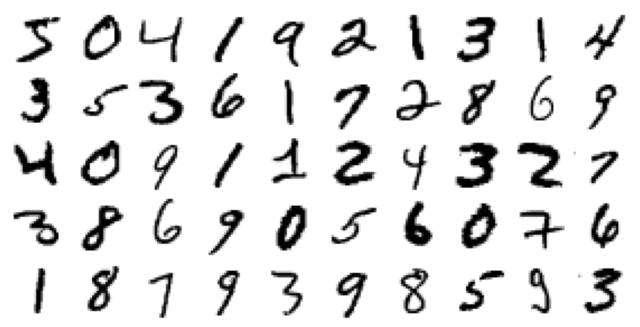

In [ ]:
plt.figure(figsize=(9,9))
plot_digits(digits, images_per_row=10)
save_fig("original digits")
plt.show()

Saving figure noisy digits


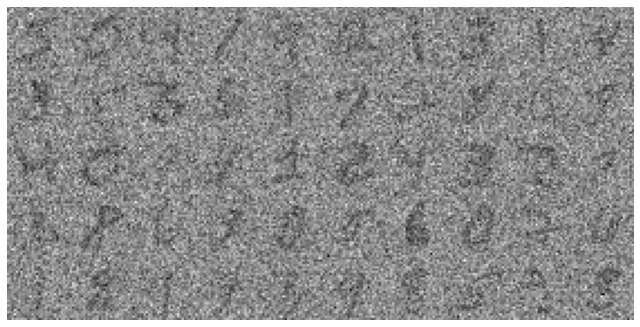

In [ ]:
plt.figure(figsize=(9,9))
plot_digits(digits_noisy, images_per_row=10)
save_fig("noisy digits")
plt.show()

Saving figure denoised digits vanilla


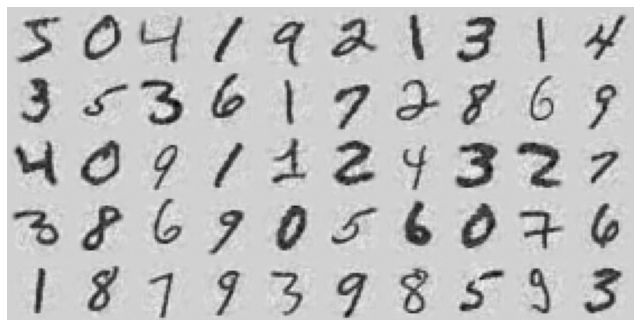

In [ ]:
digits_denoised_replicated = replicated.baricenter(digits)

plt.figure(figsize=(9,9))
plot_digits(digits_denoised_replicated, images_per_row=10)
save_fig("denoised digits vanilla")
plt.show()

___

In [ ]:
vanilla.fit(
    x_train,
    x_train,
    epochs=10,
    callbacks=[checkpoint_callback, stop_train_callback]
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0015
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0014
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0014
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0013
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0013
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0013
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0012
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0012
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0012


In [ ]:
digits = x_train[:50]
digits_noisy = models.add_gaussian_noise(digits, stddev=0.8)

Saving figure original digits


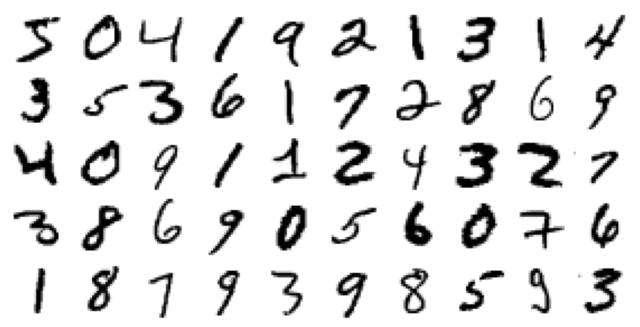

In [ ]:
plt.figure(figsize=(9,9))
plot_digits(digits, images_per_row=10)
save_fig("original digits")
plt.show()

Saving figure noisy digits


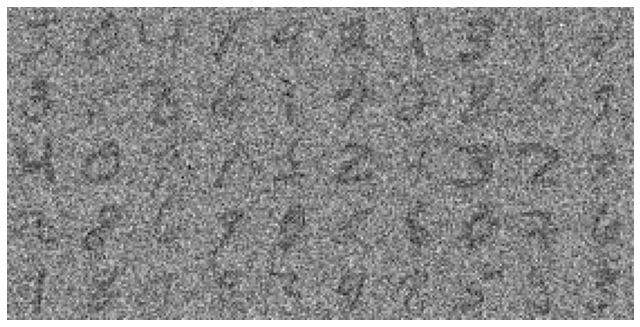

In [ ]:
plt.figure(figsize=(9,9))
plot_digits(digits_noisy, images_per_row=10)
save_fig("noisy digits")
plt.show()

In [ ]:
loaded = models.AutoEncoder(input_dim, bottleneck, hidden_layers, n_neurons, activation, activation_last)
loaded.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())

In [ ]:
loaded.train_on_batch(x_train[:1], x_train[:1])

0.12792345881462097

In [ ]:
loaded.load_weights(path)

Saving figure denoised digits vanilla


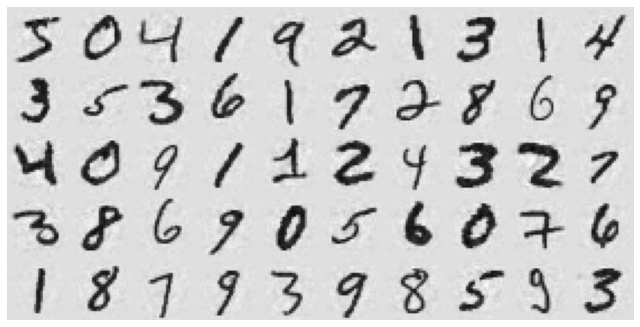

In [ ]:
digits_denoised_vanilla = loaded(digits)

plt.figure(figsize=(9,9))
plot_digits(digits_denoised_vanilla, images_per_row=10)
save_fig("denoised digits vanilla")
plt.show()